# Solving the Shallow Water Equations

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [63]:
#test u function
def u(x):
    #return 2*(1./(1.+np.exp(-x+10)))-1
    return np.zeros(x.shape[0])+1

def h(x):
    var =  (x-8)*(x-12)*-1
    var /=12
    return 10+var*(np.sign(var)+1)

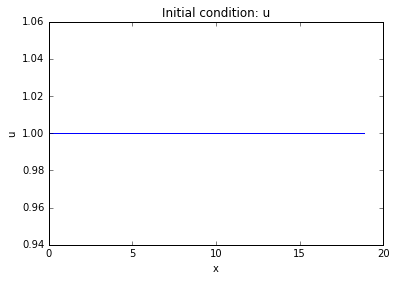

In [64]:
x = np.linspace(0, 6*np.pi, 50)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Initial condition: u')
plt.plot(x,u(x))
plt.show()

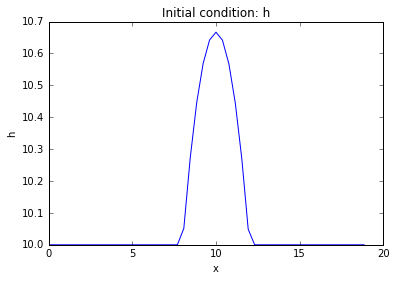

In [65]:
plt.plot(x,h(x))
plt.xlabel('x')
plt.ylabel('h')
plt.title('Initial condition: h')
plt.show()

In [85]:
eps_u = 5.
eps_h = 5.
eps = 5.
N = 100

def phi_u(r, eps_u):
    return np.exp(-eps_u**2 * r**2)

def phi_h(r, eps_h):
    return np.exp(-eps_h**2 * r**2)

In [86]:
#building the distances matrix
xi = np.linspace(0, 6*np.pi, N)
vi = xi.reshape((N,1))
D = np.abs(vi-xi)

In [87]:
#finding the initial weights
Gamma_h = np.linalg.solve(phi_h(D, eps), h(xi))
Gamma_u = np.linalg.solve(phi_u(D, eps), u(xi))
print Gamma_h
print Gamma_u

[ 8.14167908  4.21064768  5.84232293  5.18021982  5.44791038  5.33974647
  5.38344729  5.36579139  5.37292466  5.3700427   5.37120706  5.37073664
  5.3709267   5.37084991  5.37088094  5.3708684   5.37087347  5.37087142
  5.37087225  5.37087191  5.37087205  5.37087199  5.37087201  5.37087201
  5.37087201  5.37087202  5.37087199  5.37087207  5.37087186  5.37087237
  5.37087112  5.3708742   5.37086658  5.37088544  5.37083876  5.37095431
  5.37066831  5.37137618  5.36962414  5.37396015  5.36323616  5.38965446
  5.32615444  5.45546022  5.48741436  5.55025876  5.5914666   5.63230654
  5.66418273  5.6905679   5.71005985  5.72322298  5.72983448  5.72997147
  5.72363471  5.7107449   5.69152957  5.66541295  5.63382525  5.59322446
  5.55237774  5.48959483  5.45840963  5.328626    5.38836387  5.3637774
  5.37374016  5.36971311  5.37134023  5.37068284  5.37094844  5.37084113
  5.37088448  5.37086697  5.37087405  5.37087119  5.37087234  5.37087188
  5.37087205  5.37087203  5.37087192  5.37087224  5.

In [88]:
#initial shape parameters
Eps_h = np.array([eps_h]*N)
Eps_u = np.array([eps_u]*N)
#print Eps_h
#print Eps_u

In [89]:
#initial colocation parameters
Xi_h = np.linspace(0, 6*np.pi, N)
Xi_u = np.linspace(0, 6*np.pi, N)
print 'Xi_h'
print Xi_h
print 'Xi_u'
print Xi_u

Xi_h
[  0.           0.19039955   0.38079911   0.57119866   0.76159822
   0.95199777   1.14239733   1.33279688   1.52319644   1.71359599
   1.90399555   2.0943951    2.28479466   2.47519421   2.66559377
   2.85599332   3.04639288   3.23679243   3.42719199   3.61759154
   3.8079911    3.99839065   4.1887902    4.37918976   4.56958931
   4.75998887   4.95038842   5.14078798   5.33118753   5.52158709
   5.71198664   5.9023862    6.09278575   6.28318531   6.47358486
   6.66398442   6.85438397   7.04478353   7.23518308   7.42558264
   7.61598219   7.80638175   7.9967813    8.18718085   8.37758041
   8.56797996   8.75837952   8.94877907   9.13917863   9.32957818
   9.51997774   9.71037729   9.90077685  10.0911764   10.28157596
  10.47197551  10.66237507  10.85277462  11.04317418  11.23357373
  11.42397329  11.61437284  11.8047724   11.99517195  12.1855715
  12.37597106  12.56637061  12.75677017  12.94716972  13.13756928
  13.32796883  13.51836839  13.70876794  13.8991675   14.08956705
  14.2

In [90]:
#approximating function (approximation of u)
def u_app(x, Gamma, Xi, Eps):
    if type(x)==np.ndarray:
        #evaluate multiple points through broadcasting
        n = x.shape[0]
        return np.dot(phi_u(x.reshape((n,1))-Xi, Eps), Gamma)
    else:
        #evaluate a single point
        return np.dot(phi_u(x-Xi, Eps), Gamma)
    
def h_app(x, Gamma, Xi, Eps):
    if type(x)==np.ndarray:
        #evaluate multiple points through broadcasting
        n = x.shape[0]
        return np.dot(phi_h(x.reshape((n,1))-Xi, Eps), Gamma)
    else:
        #evaluate a single point
        return np.dot(phi_h(x-Xi, Eps), Gamma)

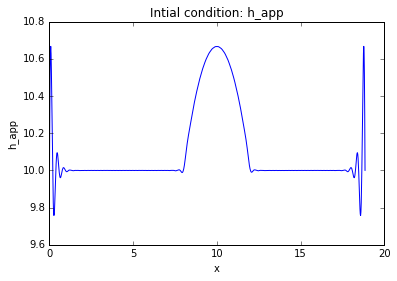

In [98]:
Nx = 1000
x = np.linspace(0, 6*np.pi, Nx)
plt.plot(x, h_app(x, Gamma_h, Xi_h, Eps_h))
plt.xlabel('x')
plt.ylabel('h_app')
plt.title('Intial condition: h_app')
plt.show()

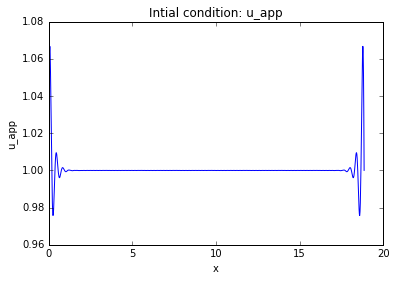

In [99]:
plt.plot(x, u_app(x, Gamma_u, Xi_u, Eps_u))
plt.xlabel('x')
plt.ylabel('u_app')
plt.title('Intial condition: u_app')
plt.show()

### Ecuaciones de evolución a utilizar

$$ \epsilon_h'(t) = 0 $$
$$ \gamma_h'(t) = 0 $$
$$ \xi_h'(t) = \frac{u \gamma _h(t) \epsilon _h(t){}^2+h \gamma _u(t) \epsilon _u(t){}^2}{\gamma _h(t) \epsilon _h(t){}^2}$$

$$ \epsilon_u'(t) = 0 $$
$$ \gamma_u'(t) = 0 $$
$$ \xi_u'(t) = \frac{g \gamma _h(t) \epsilon _h(t){}^2+u \gamma _u(t) \epsilon _u(t){}^2}{\gamma _u(t) \epsilon _u(t){}^2} $$

In [93]:
def dXi(Xi, t):
    m = Xi.shape[0]
    Xi_h = Xi[:m/2]
    Xi_u = Xi[m/2:]
    xi_h_t = (u_app(Xi_u, Gamma_u, Xi_u, Eps_u)*Gamma_h*Eps_h**2 + h_app(Xi_h, Gamma_h, Xi_h, Eps_h)*Gamma_u*Eps_u**2)/(Gamma_h*Eps_h**2)
    xi_u_t = (g*Gamma_h*Eps_h**2 + u_app(Xi_u, Gamma_u, Xi_u, Eps_u)*Gamma_u*Eps_u**2)/(Gamma_u*Eps_u**2)
    return np.concatenate((xi_h_t, xi_u_t))

g = 9.8
Nt = 5000
t = np.linspace(0.,3.,Nt)

sol = odeint(dXi, np.concatenate((Xi_h, Xi_u)), t) #it gives Xi values in time

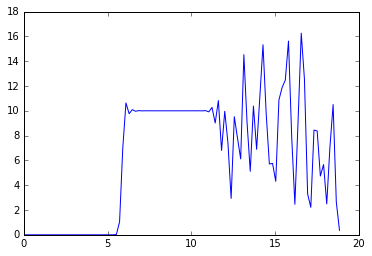

In [94]:
#solution at final time
plt.plot(x, h_app(x, Gamma_h, sol[-1][0:100], Eps_h))
plt.show()

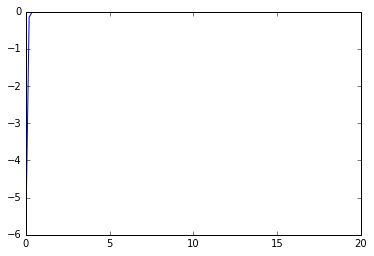

In [35]:
#solution at final time
plt.plot(x, u_app(x, Gamma_u, sol[-1][100::], Eps_u))
plt.show()

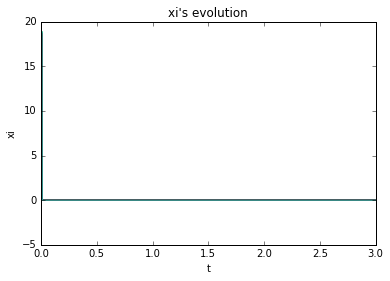

In [41]:
plt.plot(t, sol)
plt.xlabel('t')
plt.ylabel('xi')
plt.title("xi's evolution")
plt.show()

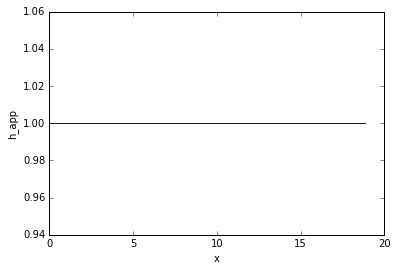

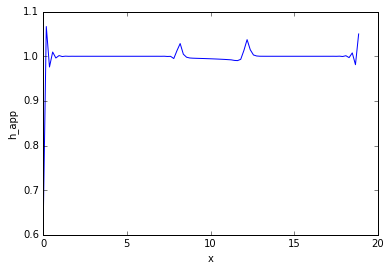

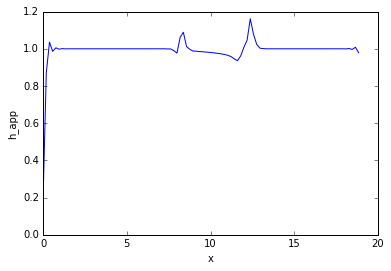

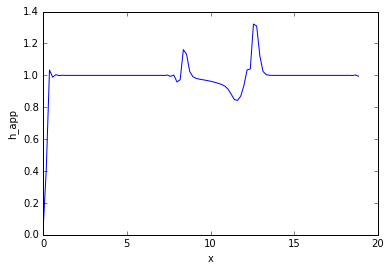

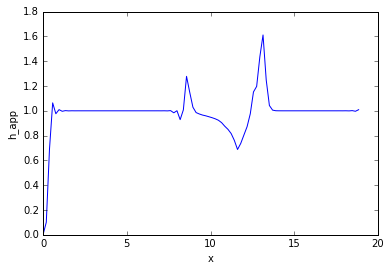

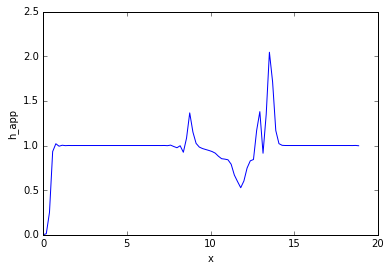

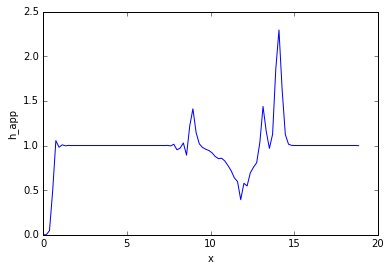

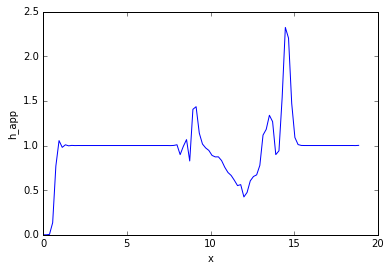

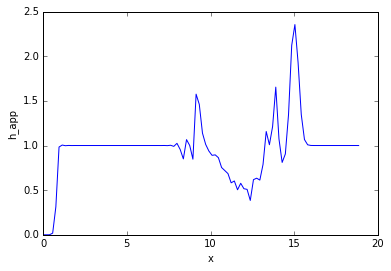

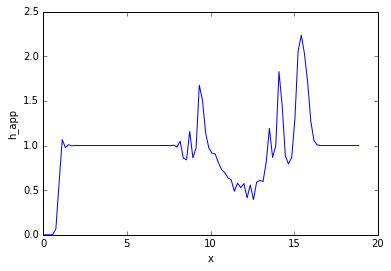

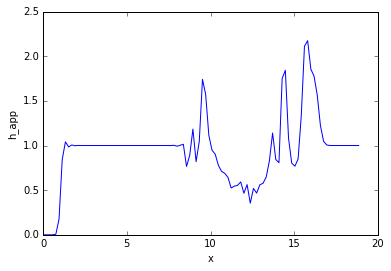

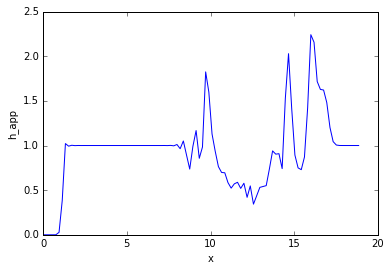

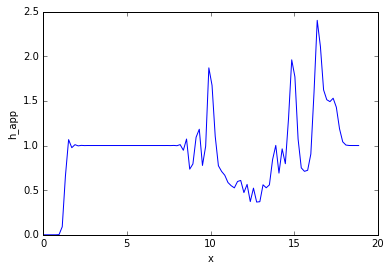

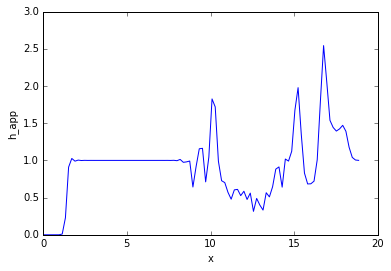

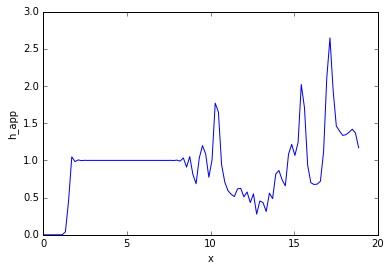

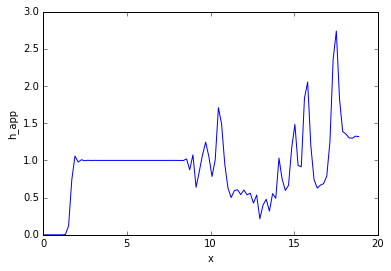

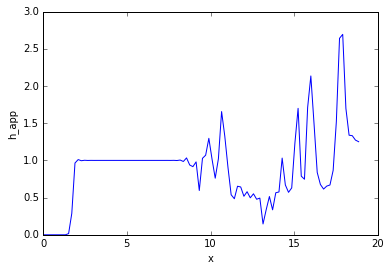

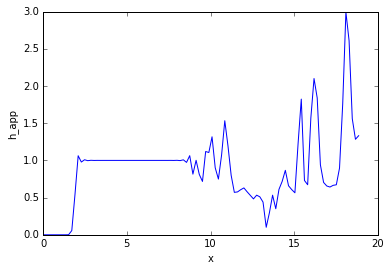

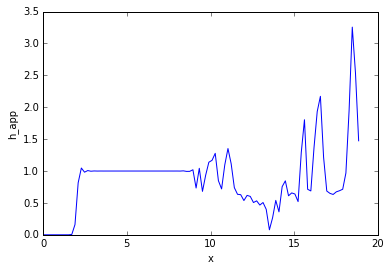

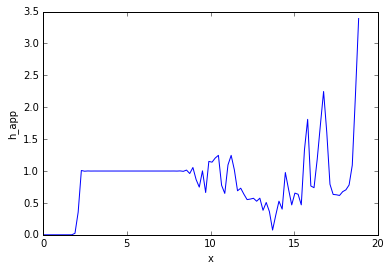

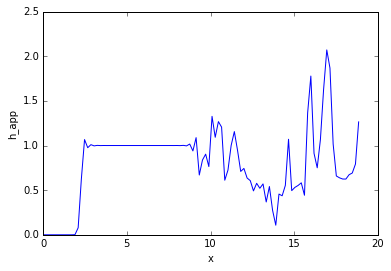

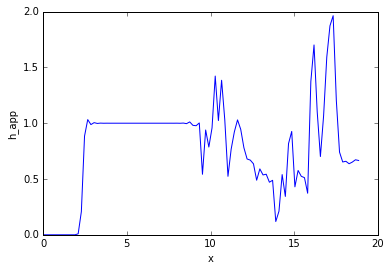

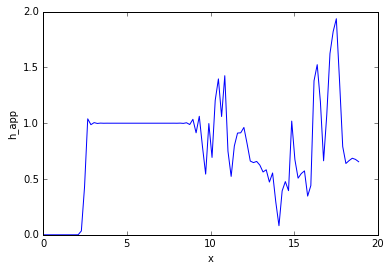

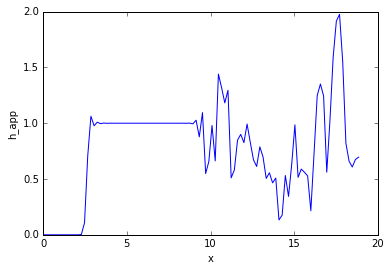

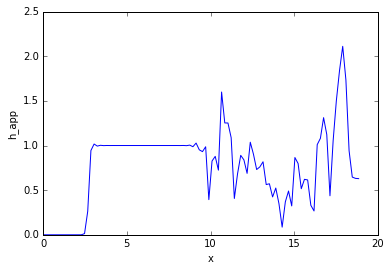

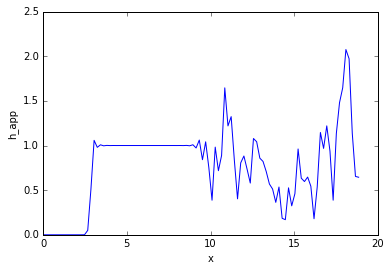

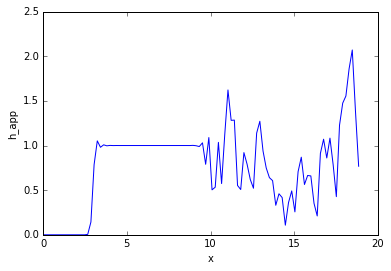

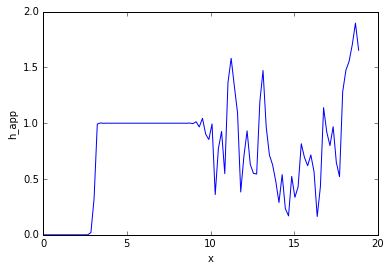

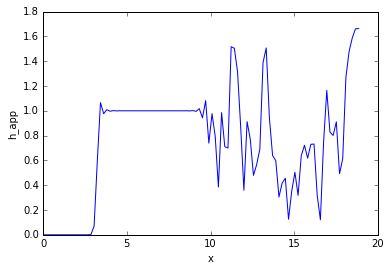

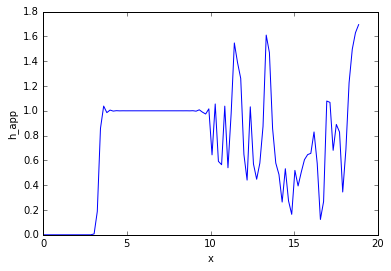

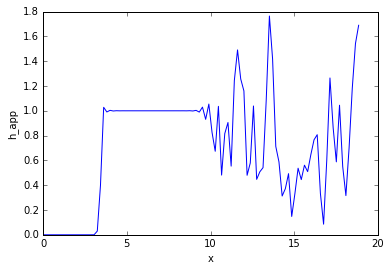

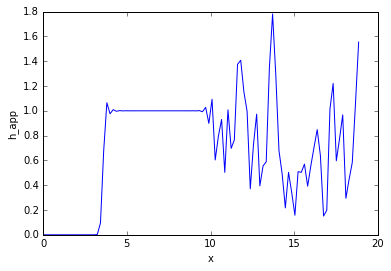

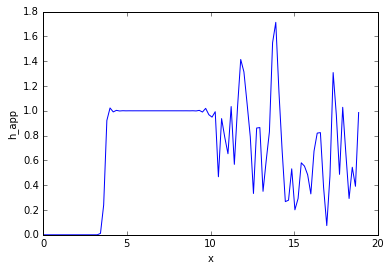

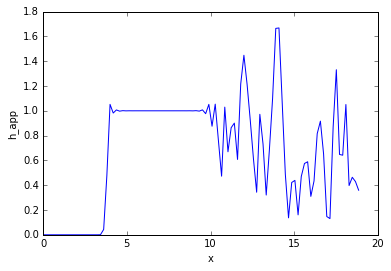

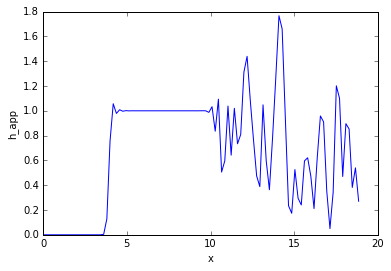

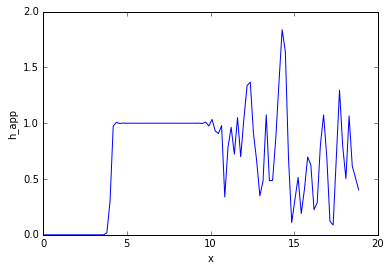

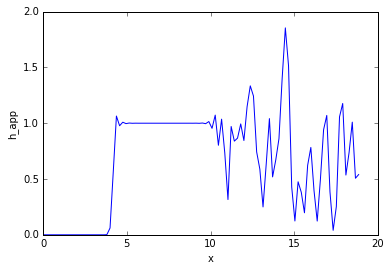

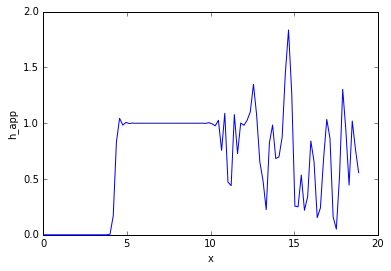

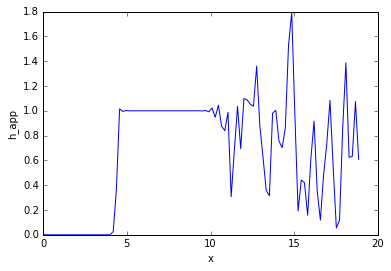

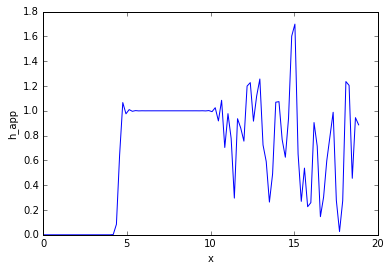

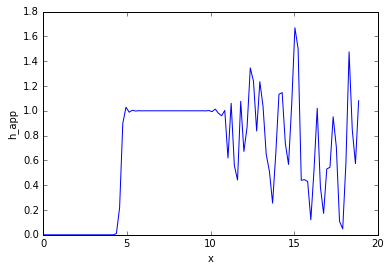

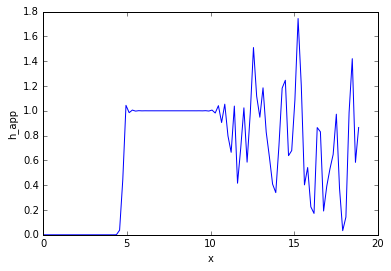

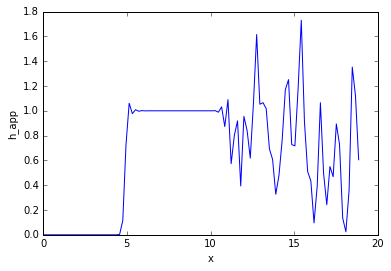

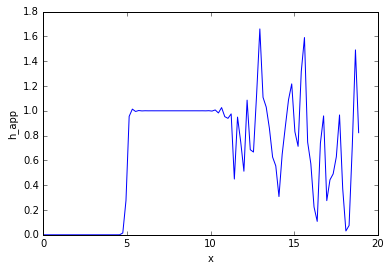

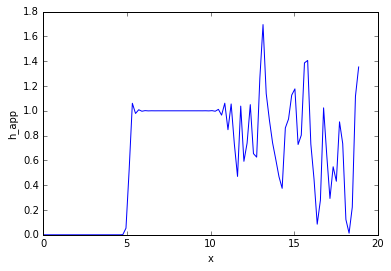

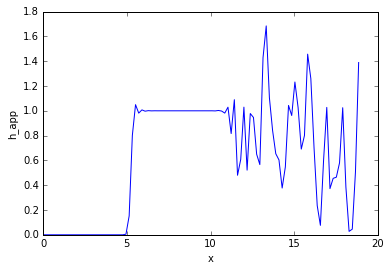

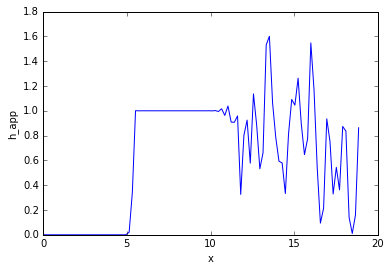

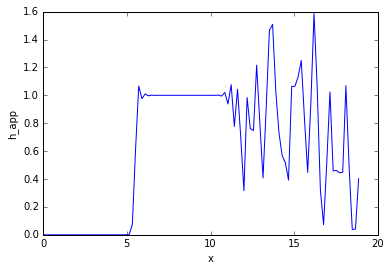

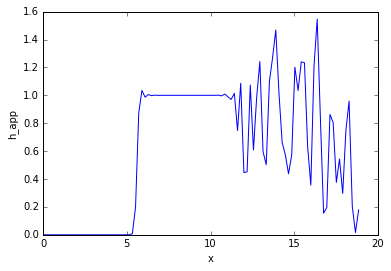

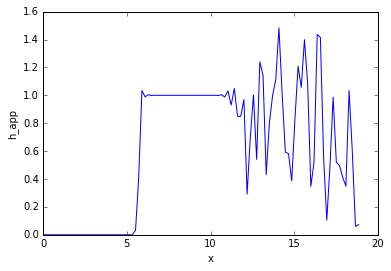

In [97]:
%matplotlib inline
m=0
while m<5000:
    plt.xlabel('x')
    plt.ylabel('h_app')
    plt.plot(x, u_app(x, Gamma_u, sol[m][0:100], Eps_h))
    plt.show()
    m+=100

#### 3d plot
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, W, antialiased=False, linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('w')
#plt.contour(X, T, W)
plt.show()